In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import os

In [3]:
# Set paths
baseDir = os.path.join(os.getcwd(),'..')
codeDir = os.path.join(baseDir, 'code')
dataDir = os.path.join(baseDir, 'data')
stimDir = os.path.join(baseDir, 'BOLD5000_Stimuli_Shared')
N_TUNING_CURVES =8

In [4]:
df = pd.read_csv(os.path.join(dataDir, f'analogData_{N_TUNING_CURVES}_bins_Average.csv'),index_col=0)

In [6]:
df_new = pd.DataFrame(cosine_similarity(df),index=df.index,columns=df.index)

In [7]:
df_new.to_csv('Similarity_matrix_analog_direction.csv')

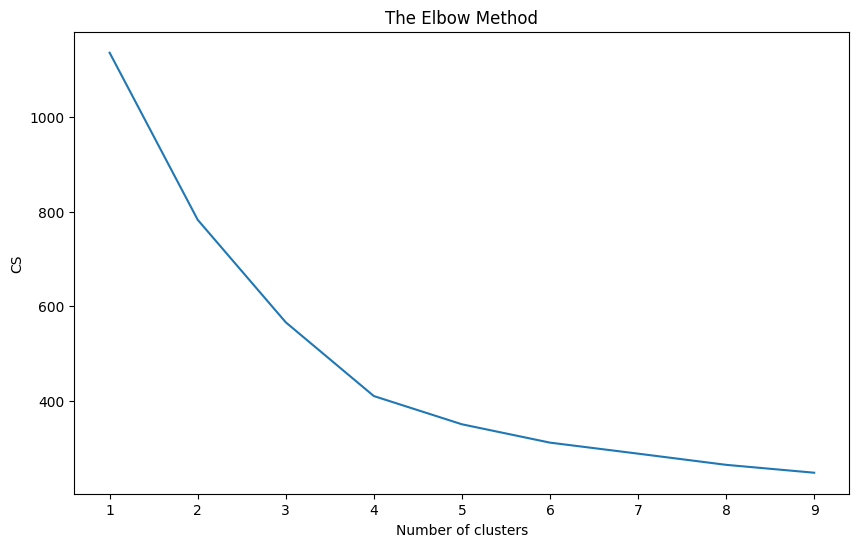

In [8]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
cs = []
plt.figure(figsize=(10,6))
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [9]:
# Number of Optimized clusters here would be 4.
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=4, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df)

KMeans(n_clusters=4)

In [10]:
kmeans.cluster_centers_

array([[-0.88364454, -0.18375847, -0.10729811,  0.06802237,  0.45018317,
         1.22418632, -0.56769073],
       [-0.61692814, -0.44219585, -0.09553091,  1.7800136 ,  0.15523293,
        -0.24436013, -0.53623151],
       [-0.85368527, -0.12356344,  1.10877996,  0.5423618 , -0.021134  ,
        -0.07481001, -0.57794903],
       [-0.67464994, -0.4711129 , -0.20180238,  0.40682068,  1.52753161,
         0.01075799, -0.59754508]])

In [11]:
pred = kmeans.predict(df)
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    140
2    128
0    123
3    109
Name: cluster, dtype: int64

In [12]:
frame.groupby(['cluster']).mean()

,0,1,2,3,4,5,6
cluster,,,,,,,
0,-0.883645,-0.183758,-0.107298,0.068022,0.450183,1.224186,-0.567691
1,-0.616928,-0.442196,-0.095531,1.780014,0.155233,-0.244360,-0.536232
2,-0.853685,-0.123563,1.108780,0.542362,-0.021134,-0.074810,-0.577949
3,-0.674650,-0.471113,-0.201802,0.406821,1.527532,0.010758,-0.597545


In [13]:
frame.reset_index(inplace=True)
frame1 = frame.groupby('cluster')['presentedImage'].apply(list).to_dict()

In [14]:
frame1

{0: ['airportTerminal2.jpg',
  'airportTerminal3.jpg',
  'amusement3.jpg',
  'apartmentBuilding2.jpg',
  'apartmentBuilding3.jpg',
  'apartmentBuilding4.jpg',
  'appleorchard3.jpg',
  'applestore1.jpg',
  'applestore2.jpg',
  'applestore4.jpg',
  'aquarium1.jpg',
  'arcade1.jpg',
  'artStudio1.jpg',
  'auto_showroom1.jpg',
  'auto_showroom3.jpg',
  'backyard6.jpg',
  'baggageClaim2.jpg',
  'baggageClaim3.jpg',
  'ballroom2.jpg',
  'bar2.jpg',
  'bar8.jpg',
  'baywindow5.jpg',
  'beach2.jpg',
  'bedroom6.jpg',
  'bikerack1.jpg',
  'bistrooutdoor6.jpg',
  'bleachers5.jpg',
  'botanicalGarden6.jpg',
  'bowlingalley5.jpg',
  'cabinIndoors5.jpg',
  'campusquad1.jpg',
  'campusquad3.jpg',
  'cargo5.jpg',
  'carmechanic.jpg',
  'castle2.jpg',
  'cave6.jpg',
  'cemetery5.jpg',
  'checkoutcounter2.jpg',
  'checkoutcounter9.jpg',
  'church6.jpg',
  'church8.jpg',
  'citystreet10.jpg',
  'closet.jpg',
  'clothingstore2.jpg',
  'clothingstore5.jpg',
  'constructionSite4.jpg',
  'copyroom2.jpg',
  